<a href="https://colab.research.google.com/github/Tor91/EIS/blob/main/Arhenius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

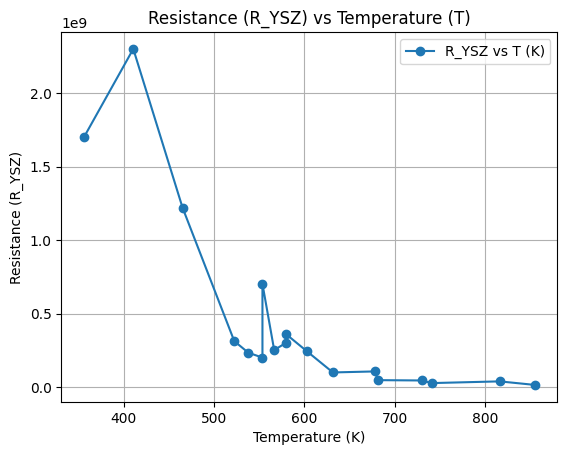

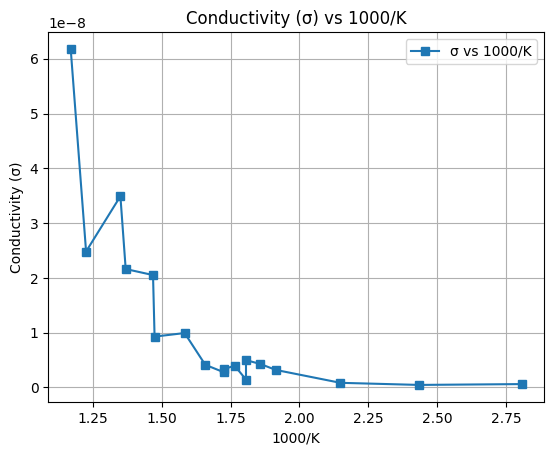

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Create the dataframe  #P1008.1 YSZ/Si Deposited at 400C
data = {
    'Resistivity': [324, 309, 280, 276, 257, 256, 238, 227, 218, 218, 213, 208, 208, 202, 196, 174, 153, 132],
    'T (K)': [854.9681818, 816.0071429, 740.6824675, 730.2928571, 680.9422078, 678.3448052, 631.5915584, 603.0201299, 579.6435065, 579.6435065, 566.6564935, 553.6694805, 553.6694805, 538.0850649, 522.5006494, 465.3577922, 410.8123377, 356.2668831],
    'R_YSZ': [1.62E+07, 4.03E+07, 2.86E+07, 4.64E+07, 4.87E+07, 1.08E+08, 1.01E+08, 2.44E+08, 3.62E+08, 3.02E+08, 2.53E+08, 7.03E+08, 2.02E+08, 2.35E+08, 3.14E+08, 1.22E+09, 2.30E+09, 1.70E+09],
    '1000/K': [1.16963417, 1.225479469, 1.350106211, 1.36931368, 1.468553408, 1.474176543, 1.583301719, 1.658319433, 1.725198314, 1.725198314, 1.764737564, 1.8061317, 1.8061317, 1.858442215, 1.91387322, 2.148884185, 2.434201479, 2.806884522],
    'σ': [6.18E-08, 2.48E-08, 3.49E-08, 2.16E-08, 2.05E-08, 9.26E-09, 9.91E-09, 4.11E-09, 2.76E-09, 3.31E-09, 3.95E-09, 1.42E-09, 4.96E-09, 4.26E-09, 3.18E-09, 8.20E-10, 4.36E-10, 5.88E-10]
}



# Sample #2 YSZ/Si   P1008.2 YSZ/Si Deposited at 400C + 300C 20 hr
data_2 = {
    'Resistivity': [290, 252, 232, 200, 180, 130],
    'T (K)': [766.6564935, 667.9551948, 616.0071429, 532.8902597, 480.9422078, 351.0720779],
    'R_YSZ': [1.28E+07, 3.42E+07, 2.37E+07, 8.24E+07, 114300000, 1.15E+09],
    '1000/K': [1.304365134, 1.497106404, 1.6233578, 1.876558976, 2.079251901, 2.848417926],
    'σ': [7.80E-08, 2.93E-08, 4.22E-08, 1.21E-08, 8.75E-09, 8.70E-10]
}



df = pd.DataFrame(data)
df2 = pd.DataFrame(data_2)

# Plot R_YSZ vs T (K)
plt.figure()
plt.plot(df['T (K)'], df['R_YSZ'], 'o-', label='R_YSZ vs T (K)')
plt.xlabel('Temperature (K)')
plt.ylabel('Resistance (R_YSZ)')
plt.title('Resistance (R_YSZ) vs Temperature (T)')
plt.legend()
plt.grid(True)
plt.show()

# Plot σ vs 1000/K
plt.figure()
plt.plot(df['1000/K'], df['σ'], 's-', label='σ vs 1000/K')
plt.xlabel('1000/K')
plt.ylabel('Conductivity (σ)')
plt.title('Conductivity (σ) vs 1000/K')
plt.legend()
plt.grid(True)
plt.show()


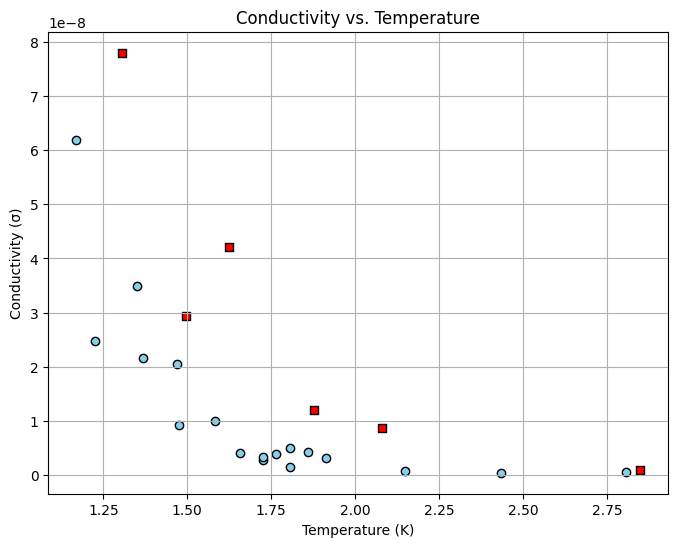

In [20]:
# prompt: scatter plot with data from above cell

import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame from the previous cell
plt.figure(figsize=(8, 6))
plt.scatter(df['1000/K'], df['σ'], marker='o', color='skyblue', edgecolor='black')
plt.scatter(df2['1000/K'], df2['σ'], marker='s', color='red', edgecolor='black')
plt.xlabel('Temperature (K)')
plt.ylabel('Conductivity (σ)')
plt.title('Conductivity vs. Temperature')
plt.grid(True)
plt.show()


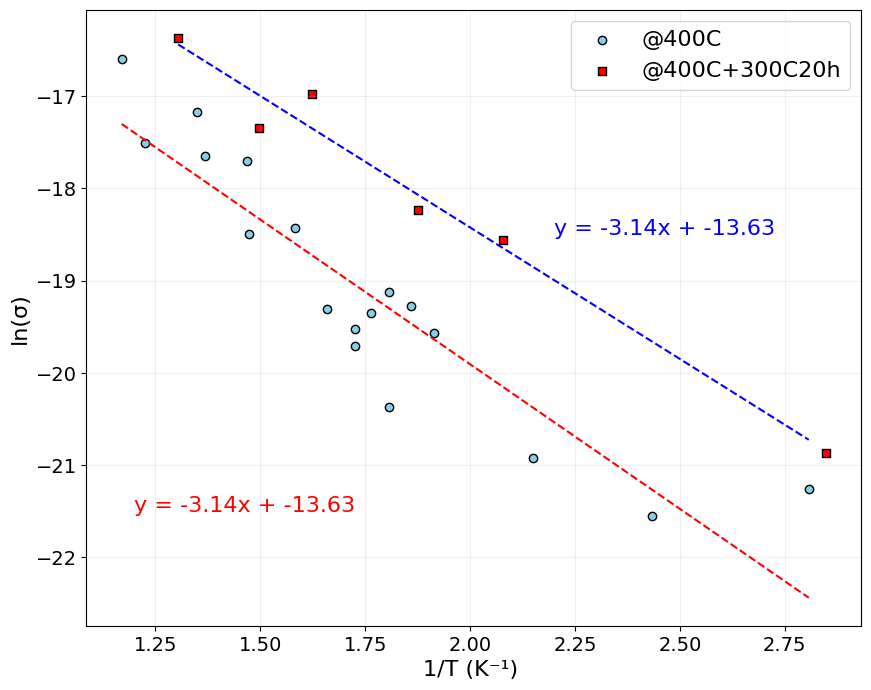

In [69]:
# prompt: make ln(sigma) and plot linearly. and make fittin

import numpy as np

# Assuming 'df' is the DataFrame from the previous cell
plt.figure(figsize=(10, 8))
plt.scatter(df['1000/K'], np.log(df['σ']), marker='o', color='skyblue', edgecolor='black', label = '@400C')
plt.scatter(df2['1000/K'], np.log(df2['σ']), marker='s', color='red', edgecolor='black', label = '@400C+300C20h')
plt.xlabel('1/T (K⁻¹) ', fontsize=16)
plt.ylabel('ln(σ)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.title('ln(Conductivity) vs. Inverse Temperature')
plt.grid(True, alpha = 0.2)

# Linear fitting
coefficients = np.polyfit(df['1000/K'], np.log(df['σ']), 1)
polynomial = np.poly1d(coefficients)
x_fit = np.linspace(min(df['1000/K']), max(df['1000/K']), 100)
plt.plot(x_fit, polynomial(x_fit), color='red', linestyle = '--', label='')


#linear Fit #2
coefficients2 = np.polyfit(df2['1000/K'], np.log(df2['σ']), 1)
polynomial = np.poly1d(coefficients2)
x_fit2 = np.linspace(min(df2['1000/K']), max(df['1000/K']), 100)
plt.plot(x_fit2, polynomial(x_fit2), linestyle = '--', color='blue', label='')




# Displaying the equation
equation = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'
plt.text(1.2, -21.5, equation, color='red',fontsize=16)

equation2 = f'y = {coefficients2[0]:.2f}x + {coefficients2[1]:.2f}'
plt.text(2.2, -18.5, equation, color='blue', fontsize=16)

plt.legend(fontsize=16)
plt.show()


In [45]:
# prompt: calculate activation energy by formyla: Ea = slope*BolzmanConstant

BoltzmanConstant = 8.617e-5 # eV/K

# Assuming 'coefficients' from the previous linear fit
slope = coefficients[0]
slope2 = coefficients2[0]

# Calculate activation energy

Ea = slope * BoltzmanConstant
Ea2 = slope2 * BoltzmanConstant

print(f"Activation Energy (Ea_1): {Ea} eV")
print(f"Activation Energy (Ea_2): {Ea2} eV")


Activation Energy (Ea_1): -0.0002702550058224831 eV
Activation Energy (Ea_2): -0.00024571596502762435 eV
